# ML for Security – лаба 1

In [1]:
import pandas as pd
import os
import pickle

In [2]:
files: list = os.listdir('data')

In [3]:
files

['classes_train.csv', 'features_train.csv']

In [4]:
classes_train = pd.read_csv(f"data/{files[0]}")

In [5]:
features_train = pd.read_csv(f"data/{files[1]}")

In [6]:
features_train.head(3)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90


In [7]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
import sklearn

# 1. Базовый контест (делают все хоть как-то)

In [8]:
test_size: int = 0.3

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features_train, classes_train, test_size=test_size, shuffle=True)

In [10]:
X_train.shape, X_test.shape

((1680, 20), (720, 20))

### XGBClassifier

In [11]:
import xgboost

In [12]:
xgb = xgboost.XGBClassifier()

In [13]:
xgb.fit(X_train, Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [14]:
pred_xgb = xgb.predict(X_test)

In [15]:
xgb_res = f1_score(pred_xgb, Y_test)

#### Результат

In [16]:
xgb_res

0.997289972899729

In [17]:
sklearn.metrics.confusion_matrix(pred_xgb, Y_test)

array([[535,   1],
       [  0, 184]], dtype=int64)

### LGBMClassifier

In [18]:
import lightgbm

In [19]:
lgbm = lightgbm.LGBMClassifier()

In [20]:
lgbm = lgbm.fit(X_train, Y_train.values.ravel())

In [21]:
pred_lgbm = lgbm.predict(X_test)

In [22]:
lgbm_res = f1_score(pred_lgbm, Y_test)

#### Результат

In [23]:
lgbm_res

0.997289972899729

### GradientBoostingClassifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gbc = GradientBoostingClassifier()

In [26]:
gbc.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

In [27]:
pred_gbc = gbc.predict(X_test)

In [28]:
gbc_res = f1_score(pred_gbc, Y_test)

#### Результат 

In [29]:
gbc_res

0.9891891891891892

### Итоги

In [30]:
#XGBClassifier
xgb_res

0.997289972899729

In [31]:
#LightGBM
lgbm_res

0.997289972899729

In [32]:
#GradientBoostingClassifier
gbc_res

0.9891891891891892

## Результат:

### По полученным результатам f1-score наиболее качественной моделью является модель LightGBM 

In [33]:
with open('models/LightGBM.pkl', 'wb') as f:
    pickle.dump(lgbm, f)

# 2. Вторичные контесты

In [34]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [35]:
features_train.head(2)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142


### XGBClassifier

In [36]:
xgb2 = xgboost.XGBClassifier()

In [37]:
xgb2.fit(X_train, Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Отбор признаков 

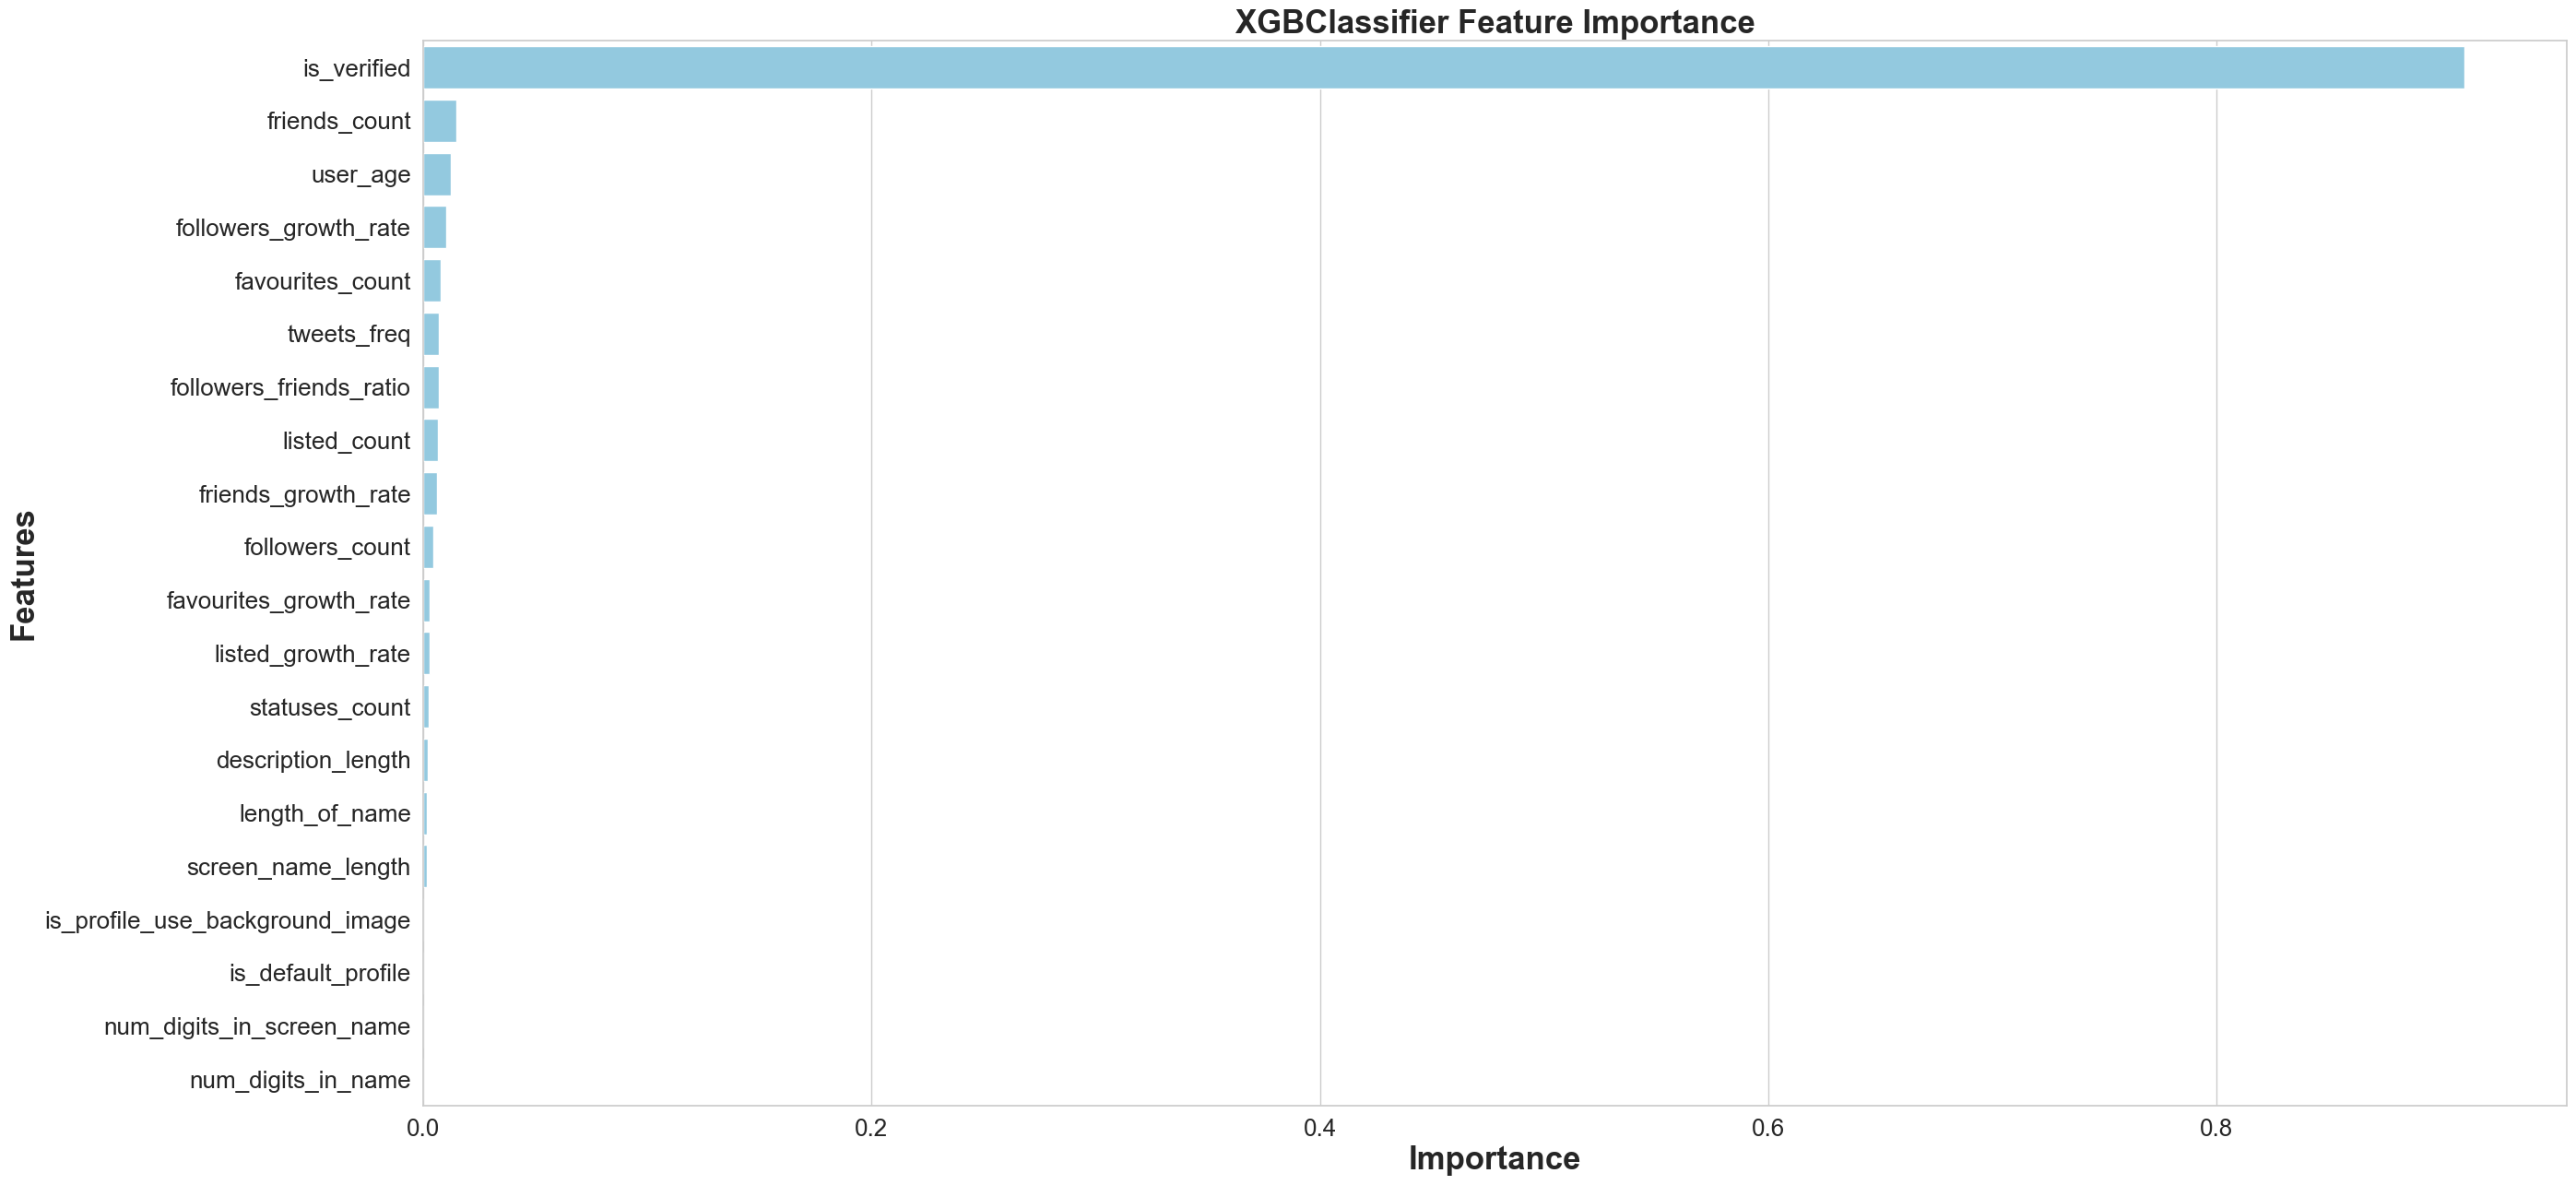

None

,Features,Gini-Importance
0,is_verified,0.910789
1,friends_count,0.014885
2,user_age,0.012227
3,followers_growth_rate,0.010189
4,favourites_count,0.007823
5,tweets_freq,0.006927
6,followers_friends_ratio,0.006887
7,listed_count,0.006498
8,friends_growth_rate,0.006119
9,followers_count,0.004621


In [38]:
feats_xgb2 = {}
for feature, importance in zip(features_train.columns, xgb2.feature_importances_):
    feats_xgb2[feature] = importance
    importances_xgb2 = pd.DataFrame.from_dict(feats_xgb2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_xgb2 = importances_xgb2.sort_values(by='Gini-Importance', ascending=False)
    importances_xgb2 = importances_xgb2.reset_index()
    importances_xgb2 = importances_xgb2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_xgb2['Gini-Importance'], y=importances_xgb2['Features'], data=importances_xgb2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('XGBClassifier Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_xgb2.head(10))

In [39]:
df_xgb2 = features_train[list(importances_xgb2.head(10)['Features'])]

In [40]:
X_train_xgb2, X_test_xgb2, Y_train_xgb2, Y_test_xgb2 = train_test_split(df_xgb2, classes_train, train_size=0.3)

In [85]:
xgb_gs = GridSearchCV(xgboost.XGBClassifier(), {'learning_rate': [0.1, 0.2, 0.3], 
                             'n_estimators': [500, 1000]}).fit(X_train_xgb2, Y_train_xgb2)

#### Обучение модели 

In [86]:
xgb_best = xgboost.XGBClassifier(**xgb_gs.best_params_)
xgb_best.fit(X_train_xgb2, Y_train_xgb2.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [87]:
xgb2_pred = xgb_best.predict(X_test_xgb2)

#### Результат 

In [88]:
confusion_matrix(Y_test_xgb2.values.ravel(), xgb2_pred)

array([[1249,    1],
       [   3,  427]], dtype=int64)

In [89]:
confusion_matrix(Y_test_xgb2.values.ravel(), xgb2_pred, normalize = 'true')

array([[9.99200000e-01, 8.00000000e-04],
       [6.97674419e-03, 9.93023256e-01]])

In [90]:
confusion_matrix(Y_test_xgb2.values.ravel(), xgb2_pred, normalize = 'pred')

array([[0.99760383, 0.00233645],
       [0.00239617, 0.99766355]])

### LightGBM

In [91]:
lgbm2 = lightgbm.LGBMClassifier()

In [92]:
lgbm2.fit(X_train, Y_train.values.ravel())

LGBMClassifier()

#### Отбор признаков 

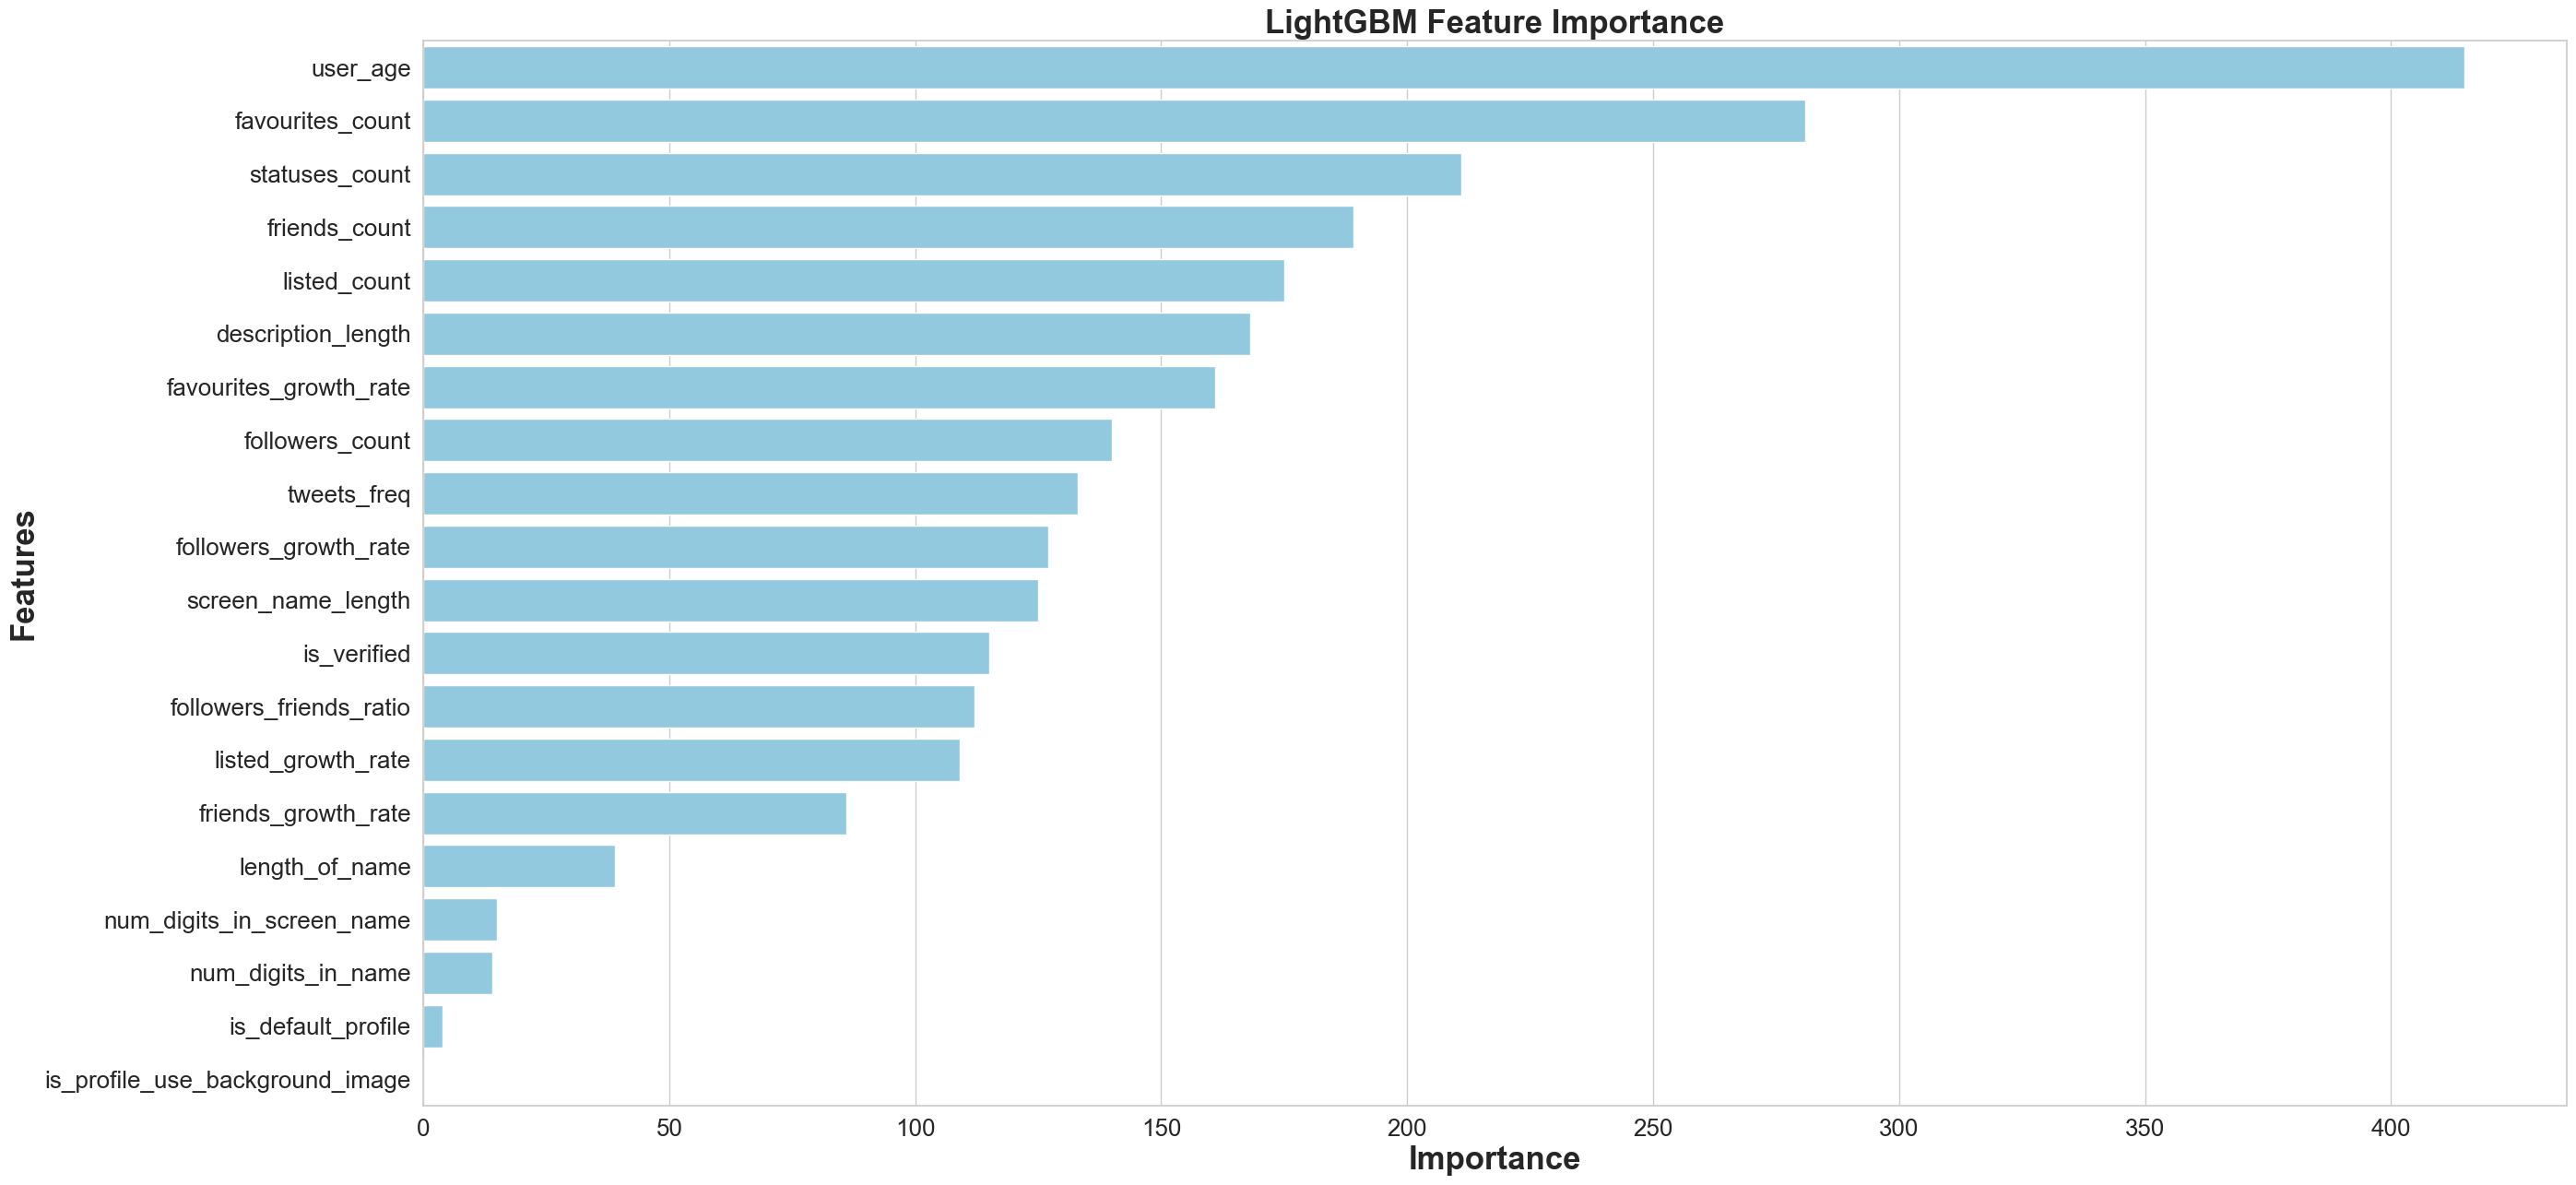

None

,Features,Gini-Importance
0,user_age,415
1,favourites_count,281
2,statuses_count,211
3,friends_count,189
4,listed_count,175
5,description_length,168
6,favourites_growth_rate,161
7,followers_count,140
8,tweets_freq,133
9,followers_growth_rate,127


In [93]:
feats_lgbm2 = {}
for feature, importance in zip(features_train.columns, lgbm2.feature_importances_):
    feats_lgbm2[feature] = importance
    importances_lgbm2 = pd.DataFrame.from_dict(feats_lgbm2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_lgbm2 = importances_lgbm2.sort_values(by='Gini-Importance', ascending=False)
    importances_lgbm2 = importances_lgbm2.reset_index()
    importances_lgbm2 = importances_lgbm2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_lgbm2['Gini-Importance'], y=importances_lgbm2['Features'], data=importances_lgbm2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('LightGBM Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_lgbm2.head(10))

In [94]:
df_lgbm2 = features_train[list(importances_lgbm2.head(10)['Features'])]

In [95]:
df_lgbm2

,user_age,favourites_count,statuses_count,friends_count,listed_count,description_length,favourites_growth_rate,followers_count,tweets_freq,followers_growth_rate
0,2711,13768,5124,3074,126,73,5.078569,6641,1.890077,2.449650
1,4424,4561,10672,1575,191,142,1.030967,8465,2.412297,1.913427
2,1358,2400,704,454,77,90,1.767305,3108,0.518409,2.288660
3,4214,599,6091,526,1515,51,0.142145,304528,1.445420,72.265781
4,3200,1177,12967,204,452,106,0.367812,13693,4.052187,4.279063
...,...,...,...,...,...,...,...,...,...,...
2395,788,0,109,2,5,124,0.000000,13,0.138325,0.016497
2396,1382,0,5503,0,2,8,0.000000,3,3.981910,0.002171
2397,1813,2,2172,0,140,130,0.001103,35504,1.198014,19.583012
2398,1274,0,2513,0,4,95,0.000000,19,1.972527,0.014914


In [96]:
X_train_lgbm2, X_test_lgbm2, Y_train_lgbm2, Y_test_lgbm2 = train_test_split(df_lgbm2, classes_train, train_size=0.3)

In [98]:
lgbm_gs = GridSearchCV(lightgbm.LGBMClassifier(), {'num_leaves': [8, 10, 12],
                                  'reg_lambda': [0.05, 0.07, 0.09]}).fit(X_train_lgbm2, Y_train_lgbm2)

D:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

#### Обучение модели

In [99]:
lgbm_best = lightgbm.LGBMClassifier(**lgbm_gs.best_params_)
lgbm_best.fit(X_train_lgbm2, Y_train_lgbm2.values.ravel())

LGBMClassifier(num_leaves=8, reg_lambda=0.09)

In [100]:
lgbm2_pred = lgbm_best.predict(X_test_lgbm2)

In [101]:
f1_score(lgbm2_pred, Y_test_lgbm2)

0.972972972972973

#### Результат 

In [102]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2)

array([[1262,   10],
       [  12,  396]], dtype=int64)

In [103]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2, normalize='true')

array([[0.99213836, 0.00786164],
       [0.02941176, 0.97058824]])

In [104]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2, normalize='pred')

array([[0.99058085, 0.02463054],
       [0.00941915, 0.97536946]])

### GradientBoostingClassifier

In [105]:
gbc2 = GradientBoostingClassifier()

In [106]:
gbc2.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

#### Отбор признаков 

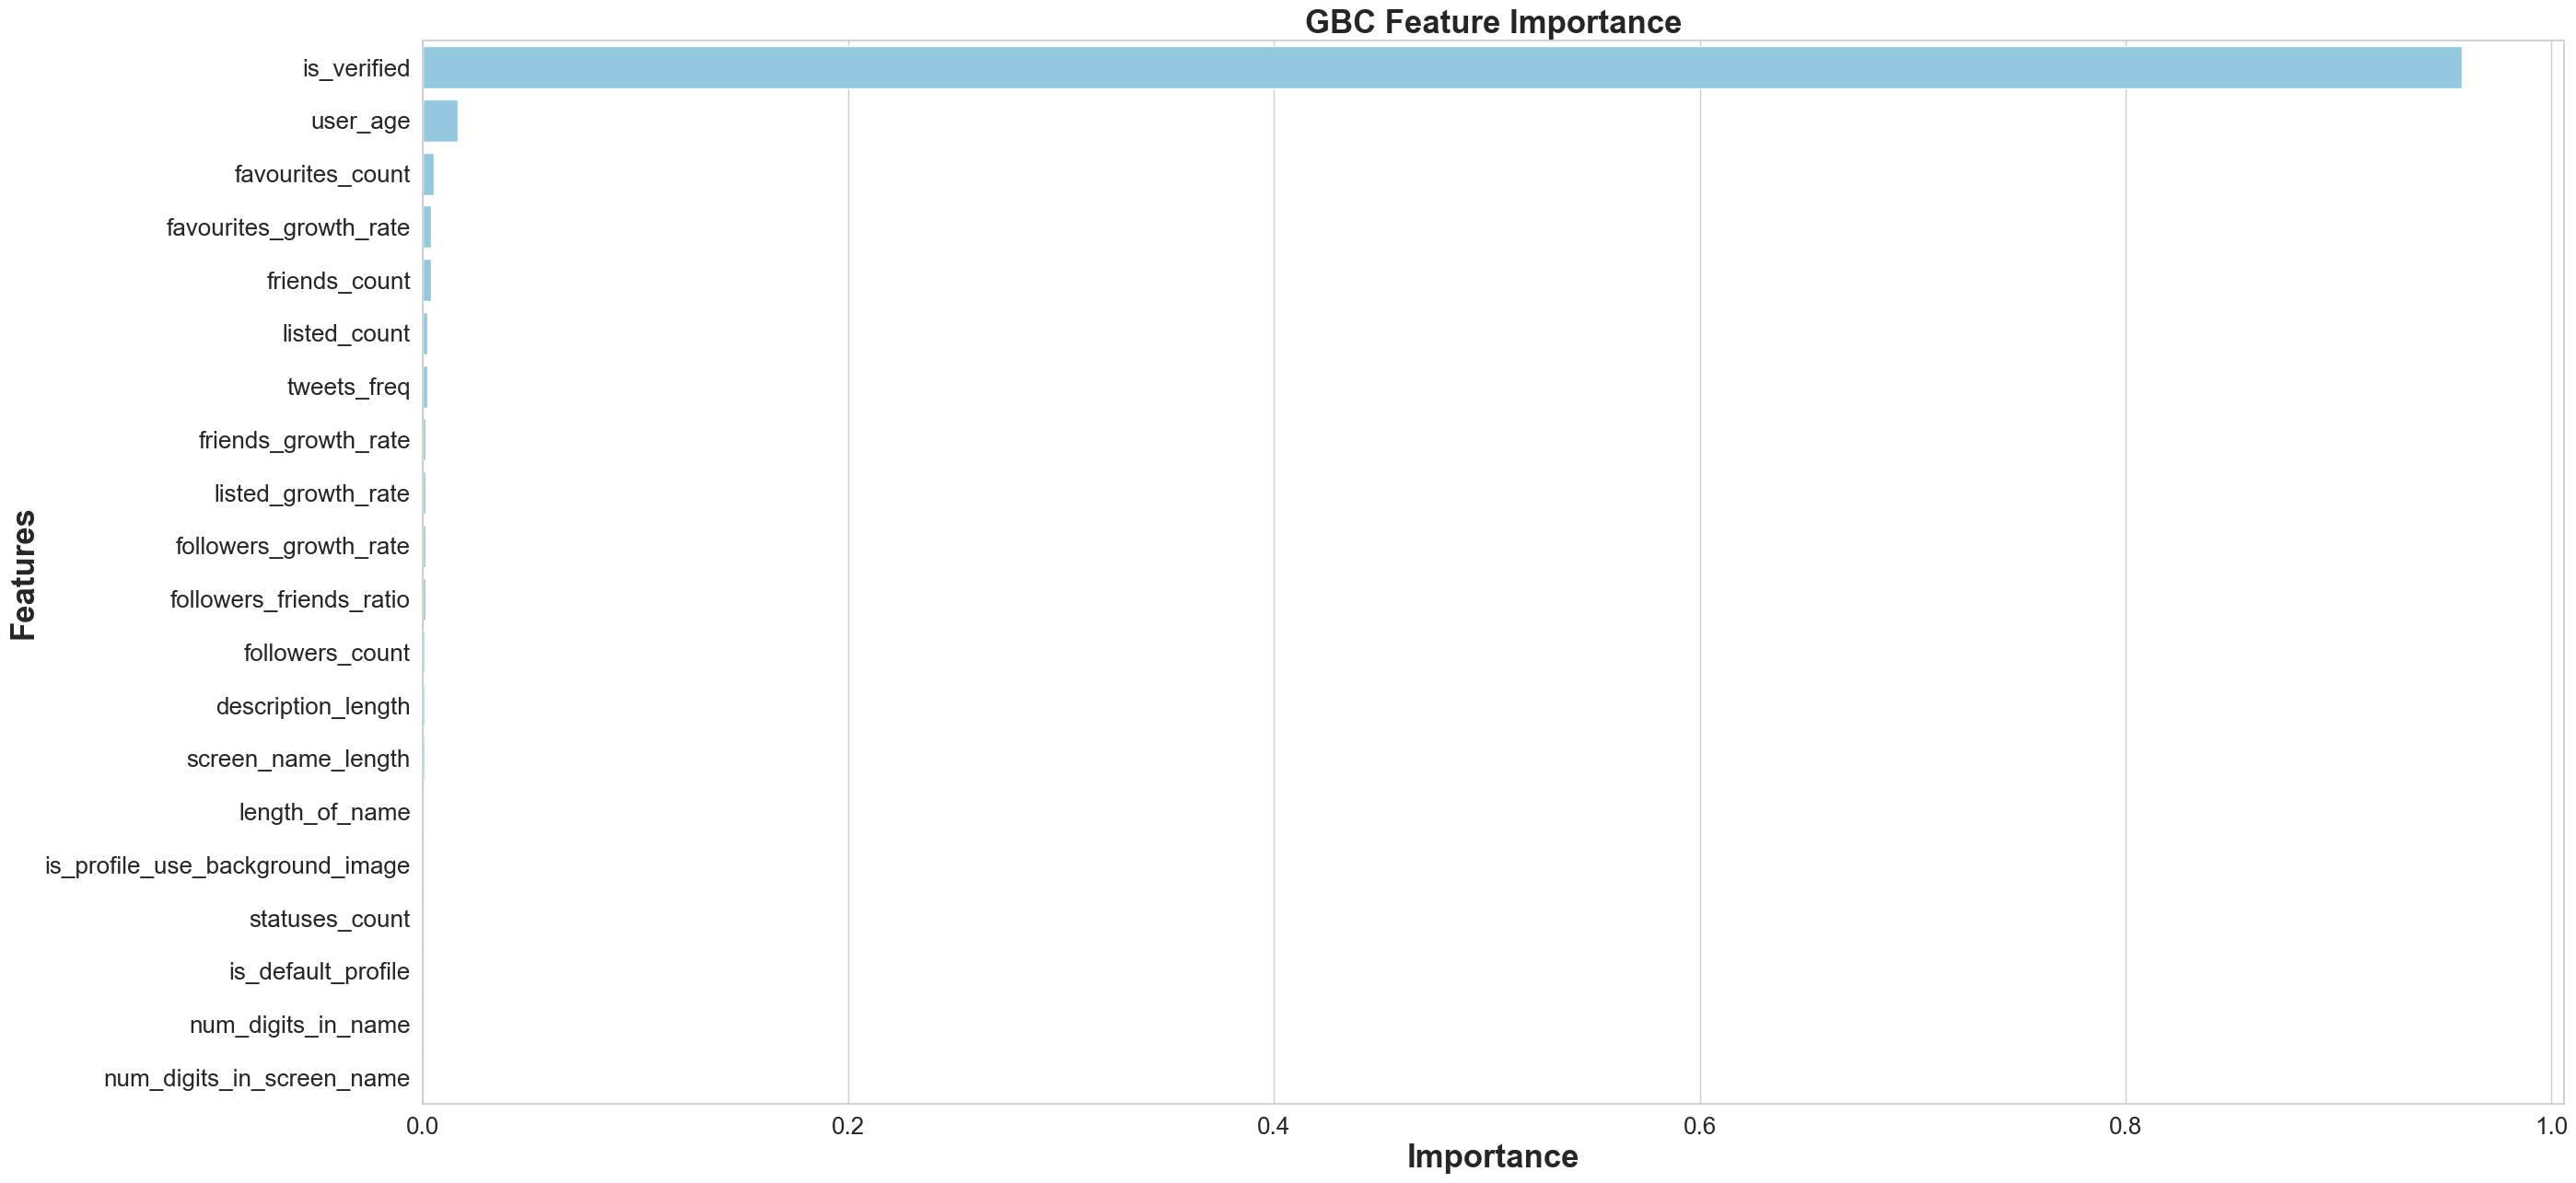

None

,Features,Gini-Importance
0,is_verified,0.958268
1,user_age,0.016510
2,favourites_count,0.005007
3,favourites_growth_rate,0.004013
4,friends_count,0.003734
5,listed_count,0.002155
6,tweets_freq,0.002085
7,friends_growth_rate,0.001409
8,listed_growth_rate,0.001340
9,followers_growth_rate,0.001328


In [107]:
feats_gbc2 = {}
for feature, importance in zip(features_train.columns, gbc2.feature_importances_):
    feats_gbc2[feature] = importance
    importances_gbc2 = pd.DataFrame.from_dict(feats_gbc2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_gbc2 = importances_gbc2.sort_values(by='Gini-Importance', ascending=False)
    importances_gbc2 = importances_gbc2.reset_index()
    importances_gbc2 = importances_gbc2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_gbc2['Gini-Importance'], y=importances_gbc2['Features'], data=importances_gbc2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('GBC Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_gbc2.head(10))

In [108]:
df_gbc2 = features_train[list(importances_gbc2.head(10)['Features'])]

In [109]:
X_train_gbc2, X_test_gbc2, Y_train_gbc2, Y_test_gbc2 = train_test_split(df_gbc2, classes_train, train_size=0.3)

In [ ]:
GradientBoostingClassifier()

In [140]:
gbc_gs = GridSearchCV(GradientBoostingClassifier(), {'learning_rate': [0.1, 0.2, 0.3],
                                                     'n_estimators': [100, 500, 1000]}).fit(X_train_gbc2, Y_train_gbc2)

D:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\P

#### Обучение модели 

In [141]:
gbc_best = GradientBoostingClassifier(**gbc_gs.best_params_)
gbc_best.fit(X_train_gbc2, Y_train_gbc2.values.ravel())

GradientBoostingClassifier(n_estimators=500)

In [114]:
gbc2_pred = gbc_best.predict(X_test_gbc2)

#### Результат 

In [115]:
confusion_matrix(Y_test_gbc2.values.ravel(), gbc2_pred, normalize = 'true')

array([[0.99765258, 0.00234742],
       [0.00497512, 0.99502488]])

### Итоги 

In [116]:
confusion_matrix(pred_xgb, Y_test, normalize='pred')

array([[1.        , 0.00540541],
       [0.        , 0.99459459]])

In [117]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2, normalize='pred')

array([[0.99058085, 0.02463054],
       [0.00941915, 0.97536946]])

In [119]:
confusion_matrix(Y_test_gbc2, gbc2_pred, normalize='true')

array([[0.99765258, 0.00234742],
       [0.00497512, 0.99502488]])

## Результат:

### По полученным результатам confusion_matrix наиболее качественной моделью является модель XGBClassifier 

In [128]:
with open('models/xgb.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

In [143]:
df_xgb2.to_csv('data/for_xgb.csv', index=False)

# Проверка работы моделей

In [145]:
import main

### LightGBM 

In [155]:
classes = pd.read_csv('data/classes_train.csv')

In [156]:
res1 = main.classify('models/LightGBM.pkl', data='data/features_train.csv')

2022-12-12 14:52:40.055 | DEBUG    | main:classify:28 - Reading data from a file: data/features_train.csv.
2022-12-12 14:52:40.067 | DEBUG    | main:classify:30 - The data file was read successfully. Moving on to loading the model.
2022-12-12 14:52:40.073 | DEBUG    | main:classify:34 - The model: LGBMClassifier() is loaded. Moving on to predictions.
2022-12-12 14:52:40.080 | DEBUG    | main:classify:39 - The predictions are ready.


In [157]:
confusion_matrix(res1, classes)

array([[1800,    1],
       [   0,  599]], dtype=int64)

In [158]:
confusion_matrix(res1, classes, normalize='true')

array([[9.99444753e-01, 5.55247085e-04],
       [0.00000000e+00, 1.00000000e+00]])

In [159]:
confusion_matrix(res1, classes, normalize='pred')

array([[1.        , 0.00166667],
       [0.        , 0.99833333]])

### XGBClassifier 

In [154]:
res2 = main.classify('models/xgb.pkl', data='data/for_xgb.csv')

2022-12-12 14:52:26.709 | DEBUG    | main:classify:28 - Reading data from a file: data/for_xgb.csv.
2022-12-12 14:52:26.724 | DEBUG    | main:classify:30 - The data file was read successfully. Moving on to loading the model.
2022-12-12 14:52:26.746 | DEBUG    | main:classify:34 - The model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...) is

In [160]:
confusion_matrix(res2, classes)

array([[1799,    3],
       [   1,  597]], dtype=int64)

In [161]:
confusion_matrix(res2, classes, normalize='true')

array([[0.99833518, 0.00166482],
       [0.00167224, 0.99832776]])

In [162]:
confusion_matrix(res2, classes, normalize='pred')

array([[9.99444444e-01, 5.00000000e-03],
       [5.55555556e-04, 9.95000000e-01]])